In [1]:
## description:
## This project
## is using yfinance to get apple stock data
## using TA Lib to extract SMA RSI MACD from the data frame provided by yfinance
## using matplotlib.pyplot to draw indicators and chart and show them to the user


C:\Users\fardi\AppData\Local\Temp\ipykernel_13392\4253765579.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start="2022-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed


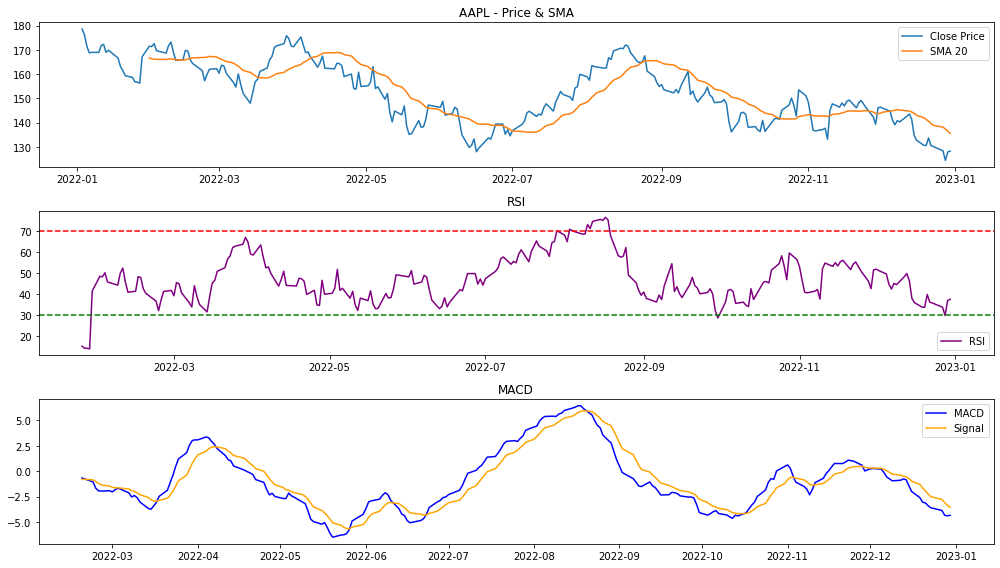

In [4]:
import yfinance as yf
import talib
import pandas as pd
import matplotlib.pyplot as plt

# دریافت داده های سهام
symbol = "AAPL"
df = yf.download(symbol, start="2022-01-01", end="2023-01-01") # داده ها به صورت دیتا فریم ذخیره میشود

# حذف ردیف‌هایی که داده ناقص دارند
df.dropna(inplace=True)

# اطمینان از اینکه داده‌ها یک‌بعدی هستند
# داده ها که دیتافریم هستند به آرایه نام پای تبدیل میشوند
# و در آخر نیز به یک بعدی تبدیل میکنیم: چون ورودی کتابخانه های تی ای باید یک بعدی باشد
close_prices = df['Close'].to_numpy().flatten()

# محاسبه اندیکاتورها
df['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
df['RSI'] = talib.RSI(close_prices, timeperiod=14)

macd, macdsignal, macdhist = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = pd.Series(macd, index=df.index)
df['MACD_Signal'] = pd.Series(macdsignal, index=df.index)


# نمایش نمودارها
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA_20'], label='SMA 20')
plt.title(f"{symbol} - Price & SMA")
plt.legend()


plt.subplot(3, 1, 2)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='orange')
plt.title("MACD")
plt.legend()

plt.tight_layout()
plt.show()
